<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

# MIIIA Advanced Models: Ejercicio 7 Bagging - 29 Jun 2020

                     Names                 User        Code
           - Alexander Camargo García   a.camargo733   200911325
           - Jaime Orjuela Viracachá    j.orjuelav     201924252
           - Jairo Pedraza Corredor     j.pedraza      201924260
           - Elquin Huertas Ramírez     e.huertas      201920061

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('../datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Teniendo en cuenta que el conjunto de datos se refiere a la cantidad de bicicletas rentadas por hora durante dos años, esta agrupación muestra que el valor esperado de renta por hora en días hábiles es 188.5 mientras que para días no hábiles es de 193. Tambien se observa en general que el promedio de bicicletas rentadas no cambia mucho entre días hábiles y días no hábiles.

In [9]:
# mean rentals for each value of "hour"
hourly=bikes.groupby('hour').total.mean()
hourly

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

<BarContainer object of 24 artists>

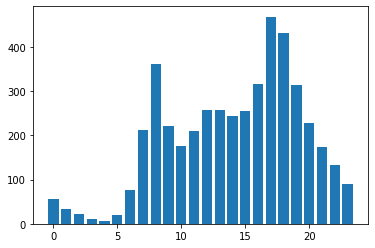

In [10]:
import matplotlib.pyplot as plt
plt.bar(range(24),hourly)

En general el total de bicicletas rentadas por hora,nos muestra que las  franjas horarias mejor desempeño de renta son las 17:00 y las 18:00 seguido por 8:00 que coincide con la horas pico, donde se tiene la mayor cantidad de movilización de personas de acuerdo a los horarios de ingreso y salida de la mayoría de establecimientos comerciales, administrativos y educativos. 

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

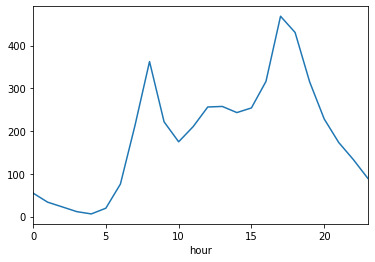

In [11]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

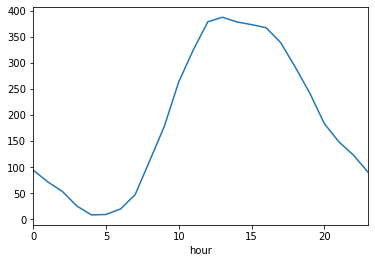

In [12]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

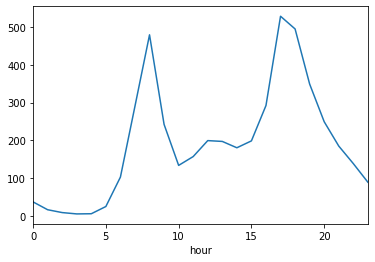

In [13]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

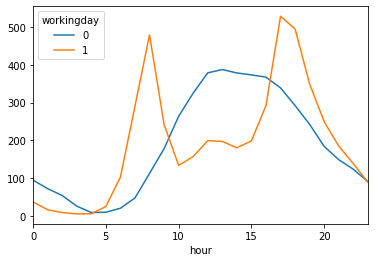

In [14]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Comparando el comportamiento del alquiler por hora en días hábiles y no hábiles, se encuentran dos picos en días hábiles a las 8:00 y a las 17:00 que coincide con los horarios de inicio y finalización de actividades de la mayoría de establecimientos comerciales, administrativos y educativos; mientras que para los días no hábiles hay un aumento paulatino que se hace máximo cerca al medio día que coincide con la hora del almuerzo. En general la distribución de renta de bicicletas yiene un comportamiento muy diferente en días hábiles y no hábiles. Por otra parte ninguna de las dos distribución seguen un comportamiento lineal

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

## Partición de la base

In [15]:
#Definicion de bases
y = bikes['total']
x= bikes[['hour','workingday']]

In [16]:
# Partición de la base en train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [56]:
#Ajuste de la regresiopn lineal
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm 
from scipy import stats 
%matplotlib inline

In [59]:
#ajustamos el modelo con los datos de train
x_train_cons = sm.add_constant(x_train) 
lr = sm.OLS(y_train, x_train_cons) 
regressor_lin=lr.fit() #training the algorithm
regressor_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     795.3
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          2.76e-316
Time:                        20:19:21   Log-Likelihood:                -53252.
No. Observations:                8164   AIC:                         1.065e+05
Df Residuals:                    8161   BIC:                         1.065e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.5112      4.432     14.781      0.000      56.823      74.199
hour          10.4936      0.263     39.861      0.000       9.978      11.010
workingday     5.2094      3.915      1.331      0.183      -2.464      12.883
==============================================================================
Omnibus:                     1732.889   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3416.072
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       4.866   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusión:
Para el ajuste de la regresión lineal lo primero que se observa es que la variable 'workinday' no es significativa con un nivel de significancia del 5%, por otra parte la relación lineal entre 'hours' y el total de bicicletas retadas es positiva, esto significa que por cada hora que incremente en la variable 'hours', la renta de bicicletas incrementa 10.49 unidades, por otra parte.
Sin embargo el ajuste del modelo no es bueno, ya que según el R-cuadrado solo se está explicando el 16% de los datos. Por otra parte los indicadores del BIC y el AIC son demasiado grandes.
El problema de ajustar una regresión lineal a la renta total de bicicletas, en función de las horas y workinday es que según los gráficos observados en los análisis estos no siguen un comportamiento ni una relación lineal, debido al comportamiento muy particular de la renta de bicicletas en las horas picos y en los fines de semana en horas valle. La recomendación es ajustar otrs modelos que no sigan un ajuste lineal.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

Para realizar el arbol de forma manual, es necesario definir previo las funciones para caulcular el Gini, el gini_impurity y la función para evaluar las particiones 

In [170]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [171]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [172]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

 Ahora definimos la función que simula un decisiontree

In [173]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [174]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted  

In [175]:
tree_manual=tree_grow(x_train, y_train, level=0, min_gain=0.001, max_depth=None, num_pct=10)

In [176]:
tree_manual

{'y_pred': 1,
 'y_prob': 189.76634827332845,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 8164,
 'gain': 18290.70717449716,
 'sl': {'y_pred': 1,
  'y_prob': 54.5174439955931,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2721,
  'gain': 6770.815558239312,
  'sl': {'y_pred': 1,
   'y_prob': 32.69124423963134,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2385,
   'gain': 644.5082672208487,
   'sl': {'y_pred': 1,
    'y_prob': 25.349144254278727,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2043,
    'gain': 391.50907855075684,
    'sl': {'y_pred': 1,
     'y_prob': 45.02928257686676,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 681,
     'gain': 1450.3228850939745,
     'sl': {'y_pred': 1,
      'y_prob': 84.55399061032864,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 211,
      'gain': 369.9613082843207,
      'sl': {'y_pred': 1,
       'y_prob': 97.73529411764706,
       'level': 6,
       'split': -1,
       'n_samples': 100,
   

 El árbol construido para el "total", iterando de forma manual a partir de las variables "hour" y "workinday" tiene un total de  9 niveles 

In [177]:
y_predict=tree_predict(x_test, tree_manual)

In [178]:
from sklearn import metrics 
print("accuracy_score=",str(metrics.accuracy_score(y_test,y_predict)))

accuracy_score= 0.009184423218221896


observamos que el ajuste del DecisicionTree con solo las variables hours y workingday no es bueno, ya que su accuracy es del 1% aprox. lo cual nos dice que la capacidad de predicción del modelo es mala

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [179]:
#importamos las librerias necesarias
from sklearn.tree import DecisionTreeClassifier
tree_bike= DecisionTreeClassifier(max_depth=None, random_state=1)
tree_bike.fit(x_train, y_train)
y_predict_2=tree_bike.predict(x_test)
print("accuracy_score_met2=",str(metrics.accuracy_score(y_test,y_predict_2)))

accuracy_score_met2= 0.02020573108008817


Al ajustar un árbol para el la variable "total" a partir de solamente "hours" y "workingday" vemos que la capacidad de predicción del árbol es mala, esto puede ser porque se están utilizando muy pocas variables para explicar el total, y adicional, la variable "hours" tiene múltiples categorías, lo que dificulta hacer una buena predicción solo con esta información.

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [180]:
df = pd.read_csv('../datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [181]:
df.shape

(6000, 61)

In [189]:
xs = df.drop(['url', 'Popular'], axis=1)
ys = df['Popular']

In [190]:
ys.mean()

0.5

In [191]:
# train/test split
from sklearn.model_selection import train_test_split
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [192]:
#ajustamos un Decision tree
tree_st= DecisionTreeClassifier(max_depth=None, random_state=1)
tree_st.fit(xs_train, ys_train)
ys_predict=tree_st.predict(xs_test)
print("accuracy_score_DecisionTree=",str(metrics.accuracy_score(ys_test,ys_predict)))
print("F1_score_DecisionTree=",str(metrics.f1_score(ys_test,ys_predict)))

accuracy_score_DecisionTree= 0.5426666666666666
F1_score_DecisionTree= 0.5402144772117962


In [337]:
#ajustamos un Decision tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
log_reg_st=LogisticRegression()
log_reg_st.fit(xs_train, ys_train)
y_predict_lg=log_reg_st.predict(xs_test)
print("accuracy_score_logistic_Reg=",str(metrics.accuracy_score(ys_test,y_predict_lg)))
print("F1_score_logistic_Reg=",str(metrics.f1_score(ys_test,y_predict_lg)))

accuracy_score_logistic_Reg= 0.6273333333333333
F1_score_logistic_Reg= 0.6104529616724739


Evaluando y comparando los modelos basedo en las métricas del f1_scrore y el accuracy, es claro que el ajuste por Regresión logística tiene un mejor performance y una mejor capacidad de predicción que el Decision Tree para el análisis de las historias. 

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [329]:
import math

models = {'Dt': DecisionTreeClassifier(max_depth=None, random_state=1),
          'Dt_2': DecisionTreeClassifier(max_depth=2, random_state=1),
          'lr': LogisticRegression()}

#definimos 300 muestras aleatorias de la base train para estimar los tres modelos 
n_samples = xs_train.shape[0]
n_B = 300
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
len(samples)

300

In [299]:
ys_train=pd.DataFrame(ys_train)
ys_train.head()

,Popular
2420,1
1225,1
324,0
5863,1
86,1


In [300]:
ys_predict=pd.DataFrame(index=xs_test.index, columns=[list(range(n_B))])

In [338]:
mk=['Dt','Dt_2','lr'] #listamos en una lista las 3 keys de mis modelos
for i in range(300):
    X=xs_train.iloc[samples[i], :]
    y=ys_train.iloc[samples[i], :]
    ml=models[mk[int(i/100)]].fit(X,y)
    ys_predict[i]=ml.predict(xs_test)

In [336]:
ys_predict.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,0,1,1,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


El resultado anterior corresponde a las predicciones de cada observación(filas) para cada una de las 300 muestras(columnas).
Las primeras 100 columnas son las predicciones del modelo DecisionTree sin definir la profundidad máxima, las siguientes 100 corresponden al DecisionTree con profundidad máxima=2 y las últimas 100 corresponden a las predicciones con el modelo de Regresion Logística. 

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [342]:
# aca calculamos las predicciones basada en las 300 muestras 
y_pred_mv = (ys_predict.sum(axis=1) >= (n_B / 2)).astype(np.int)
#metrics.f1_score(y_pred, ys_test)
print("accuracy_score Majority Voting=",str(metrics.accuracy_score(ys_test,y_pred_mv)))
print("F1_score Majority Voting=",str(metrics.f1_score(ys_test,y_pred_mv)))

accuracy_score Majority Voting= 0.6406666666666667
F1_score Majority Voting= 0.6305688827964359


Haciendo la estimación de stories bajo la metodología de ensemble con Majority Voting, vemos que el performance y la capacidad de predicción del modelo mejora y es mejor que cualquier estimación evaluada individualmente en los pasos anteriores  

# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [344]:
from sklearn.metrics import precision_recall_curve

In [351]:
ys_predict_2= (ys_predict.sum(axis=1) / n_B)
#con la función precision_recall_curve nos devuelve una tupla de 3 componentes con la precision, la recall y el thresholds
precision, recall, thresholds = precision_recall_curve(y_test,ys_predict_2)

Ahora con estos coponentes calculamos el f1 score para cada observación y seleccionamos el máximo

In [353]:
f1_calculate = 2*recall*precision/(recall+precision)

print("F1_Score Máximo",str(np.max(f1_calculate)))
print("Thresholds Máximo=",str(thresholds[np.argmax(f1_calculate)]))


F1_Score Máximo 0.701839303000968
Thresholds Máximo= 0.10333333333333333


 El Thresholds que maximiza el ensemble con Majority voting es de 0.1033, con esto mejora el modelo, ya que el f1_score alrededor de 7pp, llegando a niveles del 0.70

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [354]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [358]:
errors = np.zeros(n_B)
    
for i in range(n_estimators):
    y_pred_w = models[mk[int(i/100)]].predict(xs_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(ys_train.iloc[samples_oob[i]], y_pred_w)

Text(0.5, 1.0, 'OOB error of each tree')

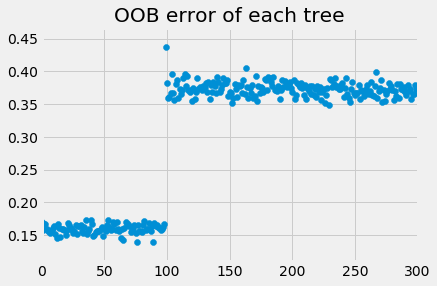

In [359]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [365]:
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum= ((ys_predict) * alpha).sum(axis=1)
y_pred_weighted = (weighted_sum >= 0.5).astype(np.int)

print("accuracy_score weighted Voting=",str(metrics.accuracy_score(ys_test,y_pred_weighted)))
print("F1_score weighted Voting=",str(metrics.f1_score(ys_test,y_pred_weighted)))

accuracy_score weighted Voting= 0.642
F1_score weighted Voting= 0.6319396847155586


Según los resultados de los errores, nos damos cuenta que las predicciones con menor error, son las correspondientes al primer lote(primeras 100) que corresponden al DecisionTree sin definir la profundidad máxima, en este caso al ser el mejor modelo de los 3 evaluados, en el ensemble con weighted voting estos primeros 100 árboles tendrían un peso mayor que los restantes evaluados con los otros dos modelos. Comparado con el Majority voting la mejora es mínima.

# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [366]:
weighted_sum.head()

1483    0.935772
2185    0.879286
2520    0.831219
3721    0.844264
3727    0.084494
dtype: float64

In [368]:
#con la función precision_recall_curve nos devuelve una tupla de 3 componentes con la precision, la recall y el thresholds
precision, recall, thresholds = precision_recall_curve(y_test,weighted_sum)

Ahora con estos coponentes calculamos el f1 score para cada observación y seleccionamos el máximo

In [369]:
f1_calculate_w = 2*recall*precision/(recall+precision)

print("F1_Score Máximo Weighted Voting",str(np.max(f1_calculate_w)))
print("Thresholds Máximo Weighted Voting=",str(thresholds[np.argmax(f1_calculate_w)]))


F1_Score Máximo Weighted Voting 0.7039106145251396
Thresholds Máximo Weighted Voting= 0.14677899496104632


El Thresholds que maximiza el ensemble con Weighted voting es de 0.1467, con esto mejora el modelo, ya que el f1_score alrededor de 7pp, llegando a niveles del 0.7039. Los resultados de máximizar el threshold son muy similares a los del ensemble con Majority Voting

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

Ahora utilizamos el lote de las estimaciones de los clasificadores de las 300 muestras para testear los 300 modelos de regresion logística 

In [370]:
xs_train_lr = pd.DataFrame(index=xs_train.index, columns=list(range(300)))
mk=['Dt','Dt_2','lr'] #listamos en una lista las 3 keys de mis modelos
for i in range(300):
    X=xs_train.iloc[samples[i], :]
    y=ys_train.iloc[samples[i], :]
    ml=models[mk[int(i/100)]].fit(X,y)
    xs_train_lr[i]=ml.predict(xs_train)    

In [371]:
xs_train_lr.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
324,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
86,1,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [379]:
from sklearn.linear_model import LogisticRegressionCV
log_reg= LogisticRegressionCV(cv = 5 )
log_reg.fit(xs_train_lr, ys_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [382]:
y_pred_LR = log_reg.predict(ys_predict)
print("accuracy_score_logistic_Reg_300=",str(metrics.accuracy_score(ys_test,y_pred_LR)))
print("F1_score_logistic_Reg_300=",str(metrics.f1_score(ys_test,y_pred_LR)))

accuracy_score_logistic_Reg_300= 0.6533333333333333
F1_score_logistic_Reg_300= 0.6618985695708712


Inicialmente los modelos ajustados con Regresión Logística, tienen una capacidad de predicción buena, con un accuracy de 0.653. Ahora procedemos a maximizar el f1_score, para esto partimos de las probabilidades estimadas del modelo de LR para cada una de las observaciones 

In [395]:
y_pred_prob = log_reg.predict_proba(ys_predict)[:,1]

In [396]:
y_pred_prob

array([0.93307903, 0.82372397, 0.64302763, ..., 0.71869667, 0.33216303,
       0.10048606])

In [397]:
#con la función precision_recall_curve nos devuelve una tupla de 3 componentes con la precision, la recall y el thresholds
precision, recall, thresholds = precision_recall_curve(ys_test,y_pred_prob)

Ahora con estos coponentes calculamos el f1 score para cada observación y seleccionamos el máximo

In [398]:
f1_calculate_lr = 2*recall*precision/(recall+precision)

print("F1_Score Máximo Log Reg Bagging",str(np.max(f1_calculate_lr)))
print("Thresholds Máximo Log Reg Bagging=",str(thresholds[np.argmax(f1_calculate_lr)]))


F1_Score Máximo Log Reg Bagging 0.7054619703930577
Thresholds Máximo Log Reg Bagging= 0.21079628828662014


Para Maximizar el f1_score el treshholds óptmimo es 0.2107, con el cual obtenemos un f1_score de 0.7054